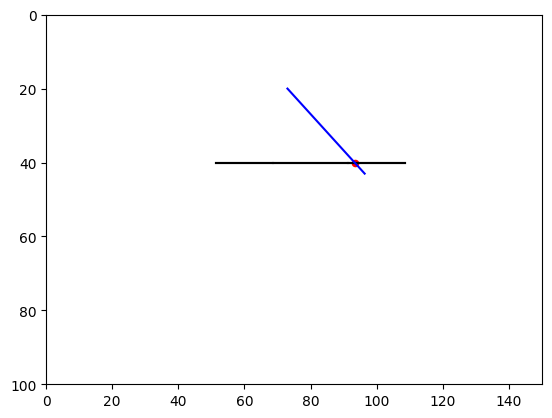

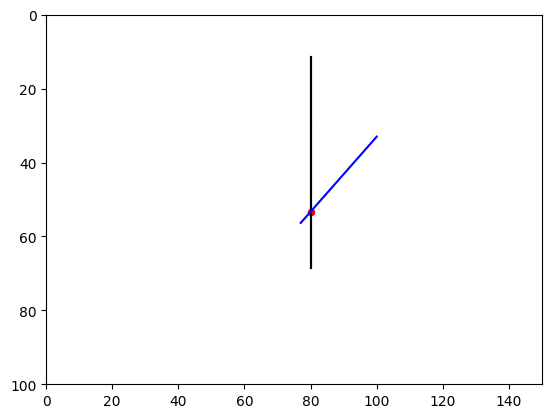

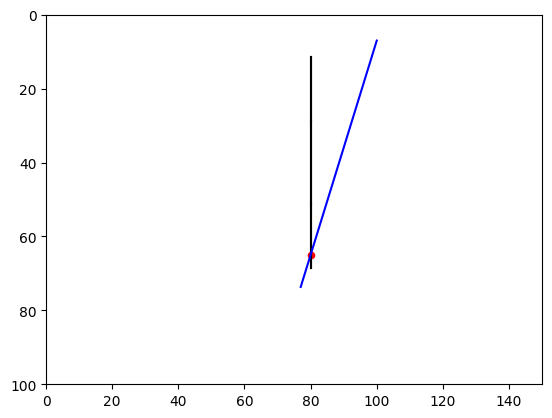

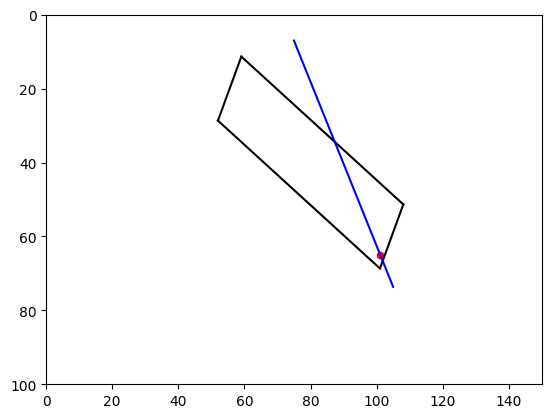

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, radians, sqrt

# Fill Lists with Starting Coordinates
xg = []
yg = []
zg = []

# Center Coordinates
xc = 80
yc = 40
zc = 40

# System (plane and line geometry)
x = [-40, -40, 40, 40, -40, 50]
y = [0, 0, 0, 0, -20, 3]
z = [-10, 10, 10, -10, 15, -10]

for i in range(len(x)):
    xg.append(x[i] + xc)
    yg.append(y[i] + yc)
    zg.append(z[i] + zc)

# Define rotation functions
def rotx(xc, yc, zc, xp, yp, zp, Rx):
    yp1 = yp * cos(Rx) - zp * sin(Rx)
    zp1 = yp * sin(Rx) + zp * cos(Rx)
    xp1 = xp
    return xp1 + xc, yp1 + yc, zp1 + zc

def roty(xc, yc, zc, xp, yp, zp, Ry):
    xp1 = xp * cos(Ry) + zp * sin(Ry)
    zp1 = -xp * sin(Ry) + zp * cos(Ry)
    yp1 = yp
    return xp1 + xc, yp1 + yc, zp1 + zc

def rotz(xc, yc, zc, xp, yp, zp, Rz):
    xp1 = xp * cos(Rz) - yp * sin(Rz)
    yp1 = xp * sin(Rz) + yp * cos(Rz)
    zp1 = zp
    return xp1 + xc, yp1 + yc, zp1 + zc

# Plot plane, line, and hit point
def plotsystem(xg, yg, zg, xh, yh, xhg, yhg, hitcolor):
    plt.plot([xg[0], xg[1]], [yg[0], yg[1]], color='k')  # Plot plane
    plt.plot([xg[1], xg[2]], [yg[1], yg[2]], color='k')
    plt.plot([xg[2], xg[3]], [yg[2], yg[3]], color='k')
    plt.plot([xg[3], xg[0]], [yg[3], yg[0]], color='k')
    plt.plot([xg[4], xg[5]], [yg[4], yg[5]], color='b')  # Plot line

    if hitcolor == 'g':  # Plot hit point at [5]
        plt.scatter(xg[5], yg[5], s=20, color=hitcolor)
    else:  # Plot hit point at h
        plt.scatter(xhg, yhg, s=20, color=hitcolor)

    plt.axis([0, 150, 100, 0])  # Replot axes and grid
    plt.axis('on')
    plt.grid(False)
    plt.show()  # Plot latest rotation

# Find hit point coordinates and color
def hitpoint(x, y, z):
    a = x[5] - x[4]
    b = y[5] - y[4]
    c = z[5] - z[4]
    Q45 = sqrt(a * a + b * b + c * c)  # Distance point 4

    lx = a / Q45  # Unit vector components point 4 to 5
    ly = b / Q45
    lz = c / Q45

    a = x[3] - x[0]
    b = y[3] - y[0]
    c = z[3] - z[0]
    Q03 = sqrt(a * a + b * b + c * c)  # Distance 0 to 3

    ux = a / Q03  # Unit vector 0 to 3
    uy = b / Q03
    uz = c / Q03

    a = x[1] - x[0]
    b = y[1] - y[0]
    c = z[1] - z[0]
    Q01 = sqrt(a * a + b * b + c * c)  # Distance 0 to 1

    vx = a / Q01  # Unit vector 0 to 1
    vy = b / Q01
    vz = c / Q01

    nx = uy * vz - uz * vy  # Normal unit vector
    ny = uz * vx - ux * vz
    nz = ux * vy - uy * vx

    vx1b = x[4] - x[0]  # Vector components 0 to 4
    vy1b = y[4] - y[0]
    vz1b = z[4] - z[0]

    Qn = (vx1b * nx + vy1b * ny + vz1b * nz)  # Perpendicular distance 4 to plane

    cosp = lx * nx + ly * ny + lz * nz  # Cos of angle p
    Qh = abs(Qn / cosp)  # Distance 4 to hit point

    xh = x[4] + Qh * lx  # Hit point coordinates
    yh = y[4] + Qh * ly
    zh = z[4] + Qh * lz

    xhg = xh + xc  # Global hit point coordinates
    yhg = yh + yc
    zhg = zh + zc

    # Out of bounds check
    a = xh - x[0]  # Components of vector V0h
    b = yh - y[0]
    c = zh - z[0]

    up = a * ux + b * uy + c * uz  # Dot products
    vp = a * vx + b * vy + c * vz

    hitcolor = 'r'  # If inbounds plot red hit point
    if up < 0:  # Change color to blue if hit point out of bounds
        hitcolor = 'b'

    if up > Q03:
        hitcolor = 'b'

    if vp < 0:
        hitcolor = 'b'

    if vp > Q01:
        hitcolor = 'b'

    a = x[5] - x[4]
    b = y[5] - y[4]
    c = z[5] - z[4]
    Q45 = sqrt(a * a + b * b + c * c)

    if Q45 < Qh:
        hitcolor = 'g'

    return xh, yh, xhg, yhg, hitcolor

# Transform coordinates and plot
def plotx(xc, yc, zc, Rx):  # Transform & plot Rx system
    for i in range(len(x)):
        xg[i], yg[i], zg[i] = rotx(xc, yc, zc, x[i], y[i], z[i], Rx)
        x[i], y[i], z[i] = xg[i] - xc, yg[i] - yc, zg[i] - zc

    xh, yh, xhg, yhg, hitcolor = hitpoint(x, y, z)  # Returns xh, yh, xhg, yhg
    plotsystem(xg, yg, zg, xh, yh, xhg, yhg, hitcolor)  # Plot

def ploty(xc, yc, zc, Ry):  # Transform & plot Ry system
    for i in range(len(x)):
        xg[i], yg[i], zg[i] = roty(xc, yc, zc, x[i], y[i], z[i], Ry)
        x[i], y[i], z[i] = xg[i] - xc, yg[i] - yc, zg[i] - zc

    xh, yh, xhg, yhg, hitcolor = hitpoint(x, y, z)
    plotsystem(xg, yg, zg, xh, yh, xhg, yhg, hitcolor)

def plotz(xc, yc, zc, Rz):  # Transform & plot Rz system
    for i in range(len(x)):
        xg[i], yg[i], zg[i] = rotz(xc, yc, zc, x[i], y[i], z[i], Rz)
        x[i], y[i], z[i] = xg[i] - xc, yg[i] - yc, zg[i] - zc

    xh, yh, xhg, yhg, hitcolor = hitpoint(x, y, z)
    plotsystem(xg, yg, zg, xh, yh, xhg, yhg, hitcolor)

# Input data and plot system
while True:
    axis = input('x, y or z ?: ')  # Input axis of rotation (lower case)
    if axis == 'x':  # If x axis
        Rx = radians(float(input('Rx Degrees ?: ')))  # Input degrees
        plotx(xc, yc, zc, Rx)  # Call function plotx

    elif axis == 'y':
        Ry = radians(float(input('Ry Degrees ?: ')))  # Input degrees
        ploty(xc, yc, zc, Ry)

    elif axis == 'z':
        Rz = radians(float(input('Rz Degrees ?: ')))  # Input degrees
        plotz(xc, yc, zc, Rz)

    elif axis == '':
        break  # Quit the program